In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img = io.imread('./original.jpg')
img.shape

(360, 640, 3)

(-0.5, 639.5, 359.5, -0.5)

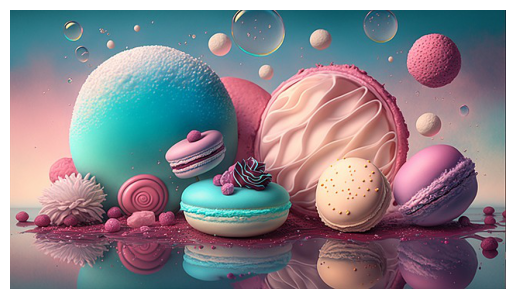

In [3]:
plt.imshow(img)
plt.axis('off')

In [4]:
img

array([[[ 22,  92, 104],
        [ 26,  96, 108],
        [ 25,  95, 107],
        ...,
        [ 11,  74,  83],
        [ 30,  76,  89],
        [  5,  41,  55]],

       [[ 23,  93, 105],
        [ 26,  96, 108],
        [ 26,  96, 108],
        ...,
        [ 11,  74,  83],
        [ 30,  76,  89],
        [  5,  41,  55]],

       [[ 22,  94, 106],
        [ 26,  98, 110],
        [ 25,  97, 109],
        ...,
        [ 12,  75,  84],
        [ 30,  76,  89],
        [  5,  41,  55]],

       ...,

       [[ 90, 103, 111],
        [ 93, 106, 114],
        [ 95, 108, 116],
        ...,
        [ 62,  96,  98],
        [ 76,  91,  98],
        [ 84,  82,  93]],

       [[ 89, 104, 111],
        [ 91, 106, 113],
        [ 92, 107, 114],
        ...,
        [ 63,  97,  99],
        [ 78,  93, 100],
        [ 86,  84,  95]],

       [[ 87, 101, 110],
        [ 88, 102, 111],
        [ 87, 101, 110],
        ...,
        [ 57,  91,  93],
        [ 68,  83,  90],
        [ 72,  70,  81]]

In [5]:
imgnew = img.reshape(img.shape[0]*img.shape[1],img.shape[2])
imgnew.shape

(230400, 3)

In [6]:
from sklearn.mixture import GaussianMixture
gmm_5 = GaussianMixture(n_components=5, max_iter=10000,random_state = 10)
gmm_5.fit(imgnew)
labels_gmm_5 = gmm_5.predict(imgnew)

In [7]:
gmm_5.means_

array([[249.13614708, 204.25615708, 191.67740762],
       [ 73.68343416, 116.07878683, 130.66533295],
       [188.83324663, 135.22922663, 139.62687588],
       [ 93.07510686, 150.22588222, 152.71795647],
       [ 88.97169158,  49.99142994,  70.69634647]])

In [8]:
Ccentres_gmm_5 = gmm_5.means_.astype(int)
Ccentres_gmm_5

array([[249, 204, 191],
       [ 73, 116, 130],
       [188, 135, 139],
       [ 93, 150, 152],
       [ 88,  49,  70]])

In [9]:
newimage_gmm_5 = []
for i in range(len(labels_gmm_5)):
    newimage_gmm_5.append(Ccentres_gmm_5[labels_gmm_5[i]])

In [10]:
newimage_gmm_5 = np.array(newimage_gmm_5)
newimage_gmm_5,type(newimage_gmm_5)

(array([[ 73, 116, 130],
        [ 73, 116, 130],
        [ 73, 116, 130],
        ...,
        [ 73, 116, 130],
        [ 73, 116, 130],
        [ 88,  49,  70]]),
 numpy.ndarray)

In [11]:
newimage_gmm_5 = newimage_gmm_5.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_5.shape


(360, 640, 3)

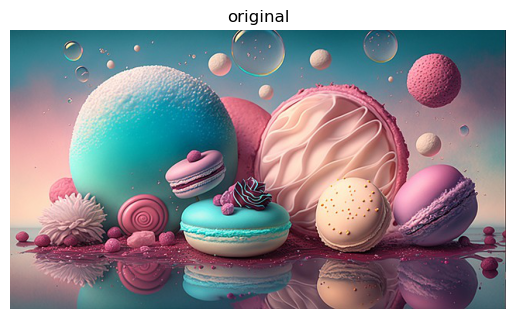

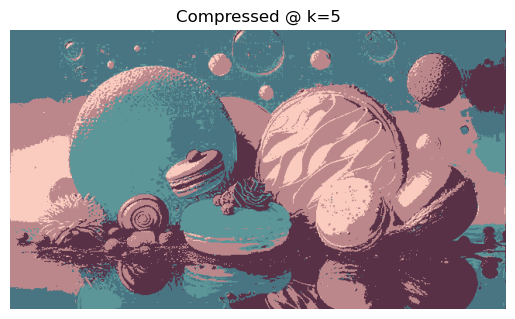

In [12]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(4)
plt.axis('off')
plt.title('Compressed @ k=5')
plt.imshow(newimage_gmm_5)
plt.show()

In [13]:
gmm_10 = GaussianMixture(n_components=10, max_iter=10000,random_state = 10)
gmm_10.fit(imgnew)
labels_gmm_10 = gmm_10.predict(imgnew)

In [14]:
gmm_10.means_

array([[225.8022169 , 169.46630954, 168.49535771],
       [ 33.82395898, 107.57064437, 121.78783047],
       [162.17903336,  96.08336296, 105.62652291],
       [ 89.19978206,  42.94506795,  65.93119391],
       [166.88192799, 144.22690067, 148.26306043],
       [250.70080032, 209.35030717, 192.54584926],
       [ 74.39964353,  89.64257189, 101.26422605],
       [ 92.57575057, 135.80427334, 152.9355495 ],
       [108.14734245, 186.12322046, 188.03316098],
       [  2.33829041, 133.95431519, 151.99699466]])

In [15]:
Ccentres_gmm_10 = gmm_10.means_.astype(int)
Ccentres_gmm_10

array([[225, 169, 168],
       [ 33, 107, 121],
       [162,  96, 105],
       [ 89,  42,  65],
       [166, 144, 148],
       [250, 209, 192],
       [ 74,  89, 101],
       [ 92, 135, 152],
       [108, 186, 188],
       [  2, 133, 151]])

In [16]:
newimage_gmm_10 = []
for i in range(len(labels_gmm_10)):
    newimage_gmm_10.append(Ccentres_gmm_10[labels_gmm_10[i]])

In [17]:
newimage_gmm_10 = np.array(newimage_gmm_10)
newimage_gmm_10,type(newimage_gmm_10)

(array([[ 33, 107, 121],
        [ 33, 107, 121],
        [ 33, 107, 121],
        ...,
        [ 74,  89, 101],
        [ 74,  89, 101],
        [ 74,  89, 101]]),
 numpy.ndarray)

In [18]:
newimage_gmm_10 = newimage_gmm_10.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_10.shape

(360, 640, 3)

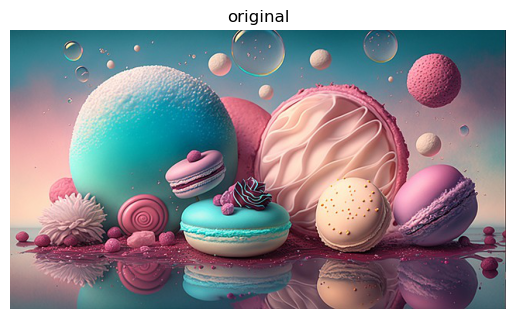

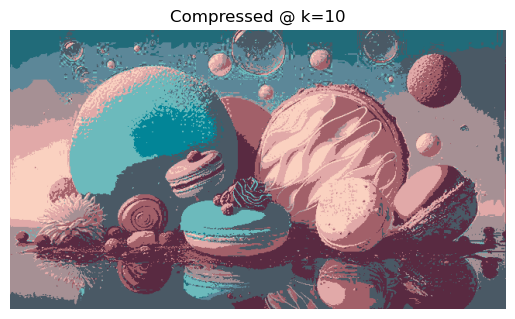

In [19]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(3)
plt.axis('off')
plt.title('Compressed @ k=10')
plt.imshow(newimage_gmm_10)
plt.show()

In [20]:
gmm_20 = GaussianMixture(n_components=20, max_iter=10000,random_state = 10)
gmm_20.fit(imgnew)
labels_gmm_20 = gmm_20.predict(imgnew)

In [21]:
gmm_20.means_

array([[220.35298958, 159.17497748, 158.10644966],
       [ 36.2317857 , 110.3943513 , 124.59029547],
       [164.40522436, 109.51157411, 118.61457485],
       [ 97.559638  ,  45.44425857,  67.15005352],
       [134.68161884, 111.33325977, 122.56874857],
       [253.71522854, 217.48331871, 198.66792736],
       [116.57220775,  69.97244526,  85.21136578],
       [101.81732006, 133.80841941, 146.71005732],
       [218.37846138, 209.40922892, 203.79482074],
       [ 75.96899015, 168.12648826, 170.32629588],
       [ 31.11695366,  80.35936878,  95.95047133],
       [177.2601625 , 153.72301139, 155.02343662],
       [ 68.00193767,  47.49612146,  74.36917978],
       [  1.74957912, 138.1547467 , 155.78388946],
       [247.12279236, 192.49152209, 186.3137775 ],
       [ 58.98912561,  18.23142602,  36.0015774 ],
       [110.08900503, 221.91561765, 211.68329665],
       [ 66.58048423,  98.62937903, 107.48073236],
       [ 93.52559466, 135.97991891, 153.06688307],
       [196.35783502, 111.22647

In [22]:
Ccentres_gmm_20 = gmm_20.means_.astype(int)
Ccentres_gmm_20

array([[220, 159, 158],
       [ 36, 110, 124],
       [164, 109, 118],
       [ 97,  45,  67],
       [134, 111, 122],
       [253, 217, 198],
       [116,  69,  85],
       [101, 133, 146],
       [218, 209, 203],
       [ 75, 168, 170],
       [ 31,  80,  95],
       [177, 153, 155],
       [ 68,  47,  74],
       [  1, 138, 155],
       [247, 192, 186],
       [ 58,  18,  36],
       [110, 221, 211],
       [ 66,  98, 107],
       [ 93, 135, 153],
       [196, 111, 119]])

In [23]:
newimage_gmm_20 = []
for i in range(len(labels_gmm_20)):
    newimage_gmm_20.append(Ccentres_gmm_20[labels_gmm_20[i]])

In [24]:
newimage_gmm_20 = np.array(newimage_gmm_20)
newimage_gmm_20,type(newimage_gmm_20)

(array([[ 36, 110, 124],
        [ 36, 110, 124],
        [ 36, 110, 124],
        ...,
        [ 66,  98, 107],
        [ 66,  98, 107],
        [ 66,  98, 107]]),
 numpy.ndarray)

In [25]:
newimage_gmm_20 = newimage_gmm_20.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_20.shape

(360, 640, 3)

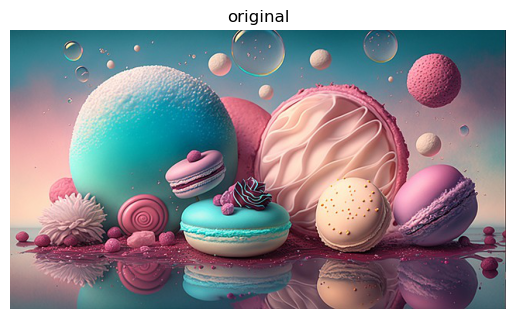

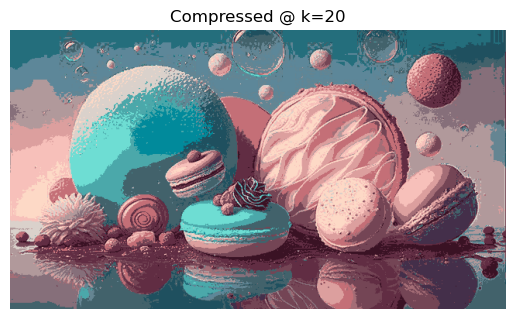

In [26]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title('Compressed @ k=20')
plt.imshow(newimage_gmm_20)
plt.show()

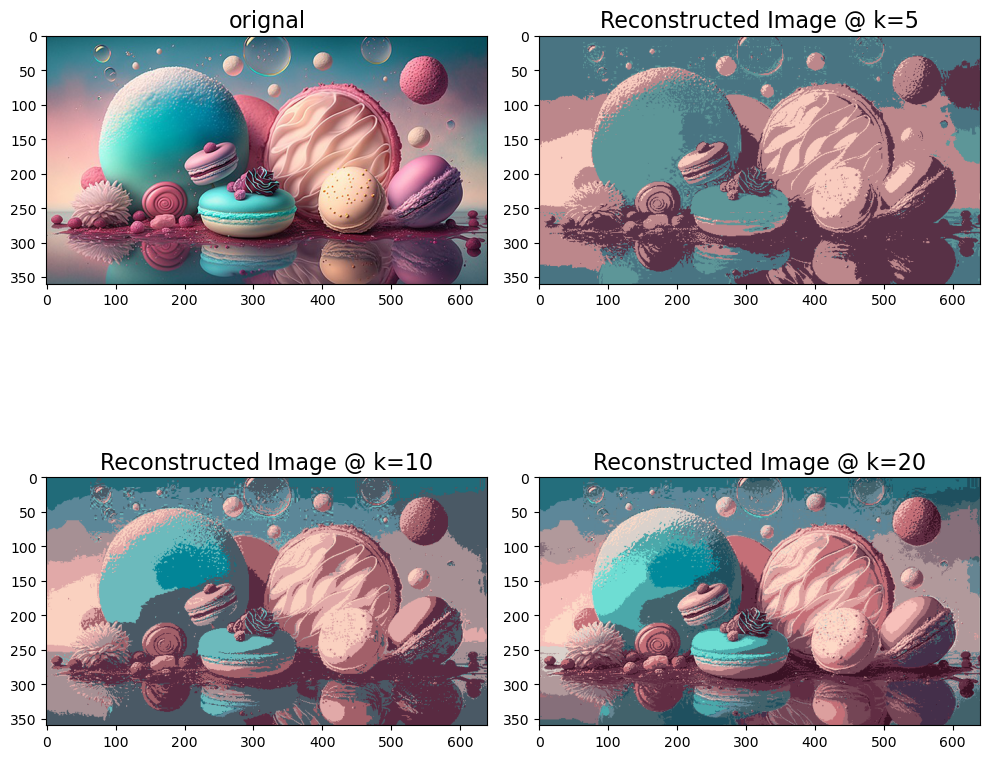

In [27]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('orignal', size=16)
axs[0, 1].imshow(newimage_gmm_5)
axs[0, 1].set_title('Reconstructed Image @ k=5', size=16)
axs[1, 0].imshow(newimage_gmm_10)
axs[1, 0].set_title('Reconstructed Image @ k=10', size=16)
axs[1, 1].imshow(newimage_gmm_20)
axs[1, 1].set_title('Reconstructed Image @ k=20', size=16)
plt.tight_layout()
plt.show()


In [28]:
io.imsave('compressed_image_5.jpg', newimage_gmm_5)
io.imsave('compressed_image_10.jpg', newimage_gmm_10)
io.imsave('compressed_image_20.jpg', newimage_gmm_20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12908\3085501781.py:1: UserWarning: compressed_image_5.jpg is a low contrast image
  io.imsave('compressed_image_5.jpg', newimage_gmm_5)
Lossy conversion from int32 to uint8. Range [49, 249]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Dell\AppData\Local\Temp\ipykernel_12908\3085501781.py:2: UserWarning: compressed_image_10.jpg is a low contrast image
  io.imsave('compressed_image_10.jpg', newimage_gmm_10)
Lossy conversion from int32 to uint8. Range [2, 250]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Dell\AppData\Local\Temp\ipykernel_12908\3085501781.py:3: UserWarning: compressed_image_20.jpg is a low contrast image
  io.imsave('compressed_image_20.jpg', newimage_gmm_20)
Lossy conversion from int32 to uint8. Range [1, 253]. Convert image to uint8 prior to saving to suppress this warning.
